In [1]:
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%matplotlib inline

In [2]:
frame_path = 'data/frames/'

In [3]:
write = False

In [29]:
vidcap = cv2.VideoCapture('data/anime/bnha23.mp4')
frame_skip = 3

success = True
fps = 24

frames = []

count = 10000
while success and count <= 11000:
    if count % frame_skip == 0:
        success, image = vidcap.read()
        frames.append(image)
        if write:
            cv2.imwrite(frame_path + 'frame' + str(count//frame_skip) + '.jpg', image)
    else:
        vidcap.grab()
    if count % 1000 == 0:
        print('Read frame #', count, ':', success)
    count += 1

Read frame # 10000 : True
Read frame # 11000 : True


In [30]:
outline_frames = []

for i, frame in enumerate(frames):
    outline_frames.append(imgToOutline(frame, invert=True))
    if write:
        cv2.imwrite('output/frames/frame' + str(i) + '.jpg', outline_frames[-1])

In [31]:
# for i in range(len(outline_frames)):
#     for pixel_idx in range(len(outline_frames[i])):
#         p = outline_frames[i][pixel_idx]
#         outline_frames[i][pixel_idx] = [p, p, p]


# print(len(outline_frames))
framesToVideo(outline_frames, fps=24/3.)

In [ ]:
for i in range(len(outline_frames)):
    for pixel_idx in range(len(outline_frames[i])):
        p = outline_frames[i][pixel_idx]
        outline_frames[i][pixel_idx] = [p, p, p]
        
outline_frames[i]

In [ ]:
plt.imshow(frames[0])

In [ ]:
gray = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)
fig = plt.figure()
plt.imshow(gray, cmap='gray')
img = cv2.GaussianBlur(gray, (3, 3), 0)
fig = plt.figure()
plt.imshow(img, cmap='gray')
laplacian = cv2.Laplacian(img, cv2.CV_64F)
fig = plt.figure()
plt.imshow(laplacian, cmap='gray')

outline = deepcopy(laplacian)

threshold = 6
for i in range(len(outline)):
    for j in range(len(outline[i])):
        if abs(outline[i, j]) >= threshold:
            outline[i, j] = 0
        else:
            outline[i, j] = 255

fig = plt.figure()
plt.imshow(outline, cmap='gray')

In [16]:
def imgToOutline(img, threshold=6, invert=False):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.Laplacian(img, cv2.CV_64F)
    
    if invert:
        main = 255
        back = 0
    else:
        main = 0
        back = 255
        
    
    for i in range(len(img)):
        for j in range(len(img[i])):
            if abs(img[i, j]) >= threshold:
                img[i, j] = main
            else:
                img[i, j] = back

    return np.array(img)

In [25]:
def imgToOutline(img, threshold=6, invert=False):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    gray = cv2.Laplacian(gray, cv2.CV_64F)
    
    if invert:
        main = 255
        back = 0
    else:
        main = 0
        back = 255
        
    
    for i in range(len(gray)):
        for j in range(len(gray[i])):
            if abs(gray[i, j]) >= threshold:
                img[i, j] = [main, main, main]
            else:
                img[i, j] = [back, back, back]

    return img

In [14]:
def framesToVideo(frames, output_path='output/video/output.mp4', fps=12):
    try:
        height, width, _ = frames[0].shape
    except ValueError:
        height, width = frames[0].shape
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    vw = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    for frame in frames:
        vw.write(np.uint8(frame))
        
    vw.release()

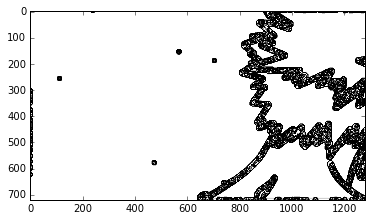

In [26]:
plt.imshow(imgToOutline(frames[0], invert=False))

In [ ]:
cv2.imwrite('test.jpg', outline)